# Pandas 10분 완성

이 소개서는 주로 신규 사용자를 대상으로 한 판다스에 대한 간략한 소개입니다. 더 복잡한 방법은 [Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 에서 볼 수 있습니다.


일반적으로 다음과 같이 가져옵니다.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Object Creation (객체 생성)

[데이터 구조 소개 섹션](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)을 참조하십시오.

판다스는 값을 가지고 있는 리스트를 통해 [시리즈](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series)를 만들고, 인덱스를 기본값으로 불러올 것입니다.

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열이있는 NumPy 배열을 전달하여 데이터 프레임 만들기 :

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,-0.977069,0.024544,0.294390,-1.336758
2013-01-02,1.759066,0.758942,0.219154,-0.636768
2013-01-03,0.477230,0.297843,0.296030,-0.039864
2013-01-04,-0.040605,-0.038518,0.205950,-0.230102
2013-01-05,0.218572,0.943371,-1.105624,-2.535383
2013-01-06,-1.003973,-1.044924,0.270270,-1.091472


시리즈와 같은 것으로 바뀔 수 있는 객체의 dict로 구성된 dataframe을 만듭니다.

In [10]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


 DataFrame 결과의 행은 다양한 데이터타입(dtypes)으로 구성됩니다.  

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython을 이용하고 계시다면, 열 이름에 대한(공용속성은 물론) tap완성 기능(tap completion)이 자동으로 활성화됩니다. 다음은 완성될 속성에 대한 부분집합(subset)입니다. 

df2.<TAB>

**IPython에서 실행하면 다음과 같은 결과값이 나온다.**
```
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D
```



보시다시피, A,B,C그리고 D 열이 탭 자동완성기능으로 실행됩니다. 물론 E도 있습니다. 나머지 속성들은 간결하게 잘라버렸습니다. 


# Viewing Data(데이터 확인하기)

**Viewing Data 데이터 확인하기**

[Basic Section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics)을 봅니다.

데이터프레임의 맨 윗 줄과 마지막 줄을 확인하고 싶을 때 .head()와 .tail()을 입력합니다. 

괄호()안에는 숫자가 들어갈 수도 있고 안 들어갈 수도 있습니다. 
숫자가 들어간다면, 윗/마지막 줄의 특정 줄을 불러올 수 있습니다. 
숫자가 들어가지 않다면, 기본값인 5로 처리됩니다.

(예시) 
df.tail(3) - 끝에서 마지막 3줄을 불러옴
df.tail() - 끝에서 마지막 5줄 불러옴

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.977069,0.024544,0.294390,-1.336758
2013-01-02,1.759066,0.758942,0.219154,-0.636768
2013-01-03,0.477230,0.297843,0.296030,-0.039864
2013-01-04,-0.040605,-0.038518,0.205950,-0.230102
2013-01-05,0.218572,0.943371,-1.105624,-2.535383


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.040605,-0.038518,0.205950,-0.230102
2013-01-05,0.218572,0.943371,-1.105624,-2.535383
2013-01-06,-1.003973,-1.044924,0.270270,-1.091472


인덱스(Index), 열(Column) 그리고 NumPy 데이터에 대한 세부 정보를 보려면 .index, .columns, .values를 입력합니다. 


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.97706949,  0.02454441,  0.29439   , -1.33675847],
       [ 1.7590656 ,  0.75894214,  0.21915375, -0.63676767],
       [ 0.47723042,  0.29784335,  0.29602974, -0.03986427],
       [-0.04060513, -0.03851772,  0.20595011, -0.23010162],
       [ 0.21857162,  0.94337121, -1.10562396, -2.53538343],
       [-1.0039726 , -1.04492377,  0.2702697 , -1.09147243]])

데이터의 대략적인 통계적 정보를 보려면 [describe() ](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)를 입력합니다.  


In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.072203,0.156877,0.030028,-0.978391
std,1.029838,0.707240,0.557635,0.908066
min,-1.003973,-1.044924,-1.105624,-2.535383
25%,-0.742953,-0.022752,0.209251,-1.275437
50%,0.088983,0.161194,0.244712,-0.864120
75%,0.412566,0.643667,0.288360,-0.331768
max,1.759066,0.943371,0.296030,-0.039864


데이터를 전치합니다.

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.977069,1.759066,0.477230,-0.040605,0.218572,-1.003973
B,0.024544,0.758942,0.297843,-0.038518,0.943371,-1.044924
C,0.294390,0.219154,0.296030,0.205950,-1.105624,0.270270
D,-1.336758,-0.636768,-0.039864,-0.230102,-2.535383,-1.091472


축 별로 정렬합니다.

In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.336758,0.294390,0.024544,-0.977069
2013-01-02,-0.636768,0.219154,0.758942,1.759066
2013-01-03,-0.039864,0.296030,0.297843,0.477230
2013-01-04,-0.230102,0.205950,-0.038518,-0.040605
2013-01-05,-2.535383,-1.105624,0.943371,0.218572
2013-01-06,-1.091472,0.270270,-1.044924,-1.003973


값 별로 정렬합니다.

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-1.003973,-1.044924,0.270270,-1.091472
2013-01-04,-0.040605,-0.038518,0.205950,-0.230102
2013-01-01,-0.977069,0.024544,0.294390,-1.336758
2013-01-03,0.477230,0.297843,0.296030,-0.039864
2013-01-02,1.759066,0.758942,0.219154,-0.636768
2013-01-05,0.218572,0.943371,-1.105624,-2.535383


# Selection (선택)


주석(Note) : 선택과 설정을 위한 Python, Numpy의 표준화된 표현들이 직관적이며, 코드 작성을 위한 양방향 작업에 유용하지만 우리는 Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc 을 추천합니다. 

[데이터 인덱싱 및 선택](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) 문서와 [다중 인덱싱 / 심화 인덱싱](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced) 문서를 확인하십시오.

## Getting (데이터 얻기)

df.A 와 동일한 Series를 생성하는 단일 열을 선택합니다.

In [22]:
df['A']

2013-01-01   -0.977069
2013-01-02    1.759066
2013-01-03    0.477230
2013-01-04   -0.040605
2013-01-05    0.218572
2013-01-06   -1.003973
Freq: D, Name: A, dtype: float64

행을 분할하는 [] 를 통해 선택합니다

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-0.977069,0.024544,0.294390,-1.336758
2013-01-02,1.759066,0.758942,0.219154,-0.636768
2013-01-03,0.477230,0.297843,0.296030,-0.039864


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.759066,0.758942,0.219154,-0.636768
2013-01-03,0.477230,0.297843,0.296030,-0.039864
2013-01-04,-0.040605,-0.038518,0.205950,-0.230102


## Selection by Label (Label 을 통한 선택)

[Label을 통한 선택](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)에서 더 많은 내용을 확인하세요.

라벨을 사용하여 횡단면을 얻는 방법입니다.

In [25]:
df.loc[dates[0]]

A   -0.977069
B    0.024544
C    0.294390
D   -1.336758
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축(의 데이터)을 얻는 방법입니다.

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.977069,0.024544
2013-01-02,1.759066,0.758942
2013-01-03,0.477230,0.297843
2013-01-04,-0.040605,-0.038518
2013-01-05,0.218572,0.943371
2013-01-06,-1.003973,-1.044924


양쪽 종단점을 포함한 라벨 슬라이싱을 봅시다.

In [27]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,1.759066,0.758942
2013-01-03,0.477230,0.297843
2013-01-04,-0.040605,-0.038518


반환되는 객체의 크기를 줄입니다.

In [28]:
df.loc['20130102',['A','B']]

A    1.759066
B    0.758942
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻습니다.

In [29]:

df.loc[dates[0],'A']


-0.9770694946651646

스칼라 값을 더 빠르게 구하는 방법입니다. (앞선 method와 동일합니다)

In [30]:
df.at[dates[0],'A']

-0.9770694946651646

## Selection by Position (위치로 선택하기)

자세한 내용은 [위치로 선택하기](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)를 참고해주세요.

넘겨받은 정수의 위치로 선택하기:

In [31]:
df.iloc[3]

A   -0.040605
B   -0.038518
C    0.205950
D   -0.230102
Name: 2013-01-04 00:00:00, dtype: float64

넘파이/파이썬 작동 방식처럼 정수로 표기된 슬라이스로 선택하기:

In [32]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.040605,-0.038518
2013-01-05,0.218572,0.943371


넘파이/파이썬 작동 방식처럼 정수로 표기된 위치값을 기반으로 선택하기:

In [33]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.759066,0.219154
2013-01-03,0.477230,0.296030
2013-01-05,0.218572,-1.105624


행만 나누고 싶을 때:

In [34]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.759066,0.758942,0.219154,-0.636768
2013-01-03,0.477230,0.297843,0.296030,-0.039864


열만 나누고 싶을 때:

In [35]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.024544,0.294390
2013-01-02,0.758942,0.219154
2013-01-03,0.297843,0.296030
2013-01-04,-0.038518,0.205950
2013-01-05,0.943371,-1.105624
2013-01-06,-1.044924,0.270270


값만 얻고 싶을 때:

In [36]:
df.iloc[1,1]

0.7589421358307237

스칼라 값을 빨리 얻고 싶을 때(위 방식과 동일):

In [37]:
df.iat[1,1]

0.7589421358307237

## Boolean Indexing (부울인덱싱)

선택한 데이터에 단일 열의 값을 사용합니다.

In [38]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.759066,0.758942,0.219154,-0.636768
2013-01-03,0.477230,0.297843,0.296030,-0.039864
2013-01-05,0.218572,0.943371,-1.105624,-2.535383


부울 조건에 충족되는 데이터프레임에서 변수를 선택합니다.

In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.024544,0.294390,NaN
2013-01-02,1.759066,0.758942,0.219154,NaN
2013-01-03,0.477230,0.297843,0.296030,NaN
2013-01-04,NaN,NaN,0.205950,NaN
2013-01-05,0.218572,0.943371,NaN,NaN
2013-01-06,NaN,NaN,0.270270,NaN


필터링 방법인 [isin()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html#pandas.Series.isin)을 사용합니다.

In [40]:
df2 = df.copy()

In [41]:
df2['E'] = ['one', 'one','two','three','four','three']

In [42]:
df2

,A,B,C,D,E
2013-01-01,-0.977069,0.024544,0.294390,-1.336758,one
2013-01-02,1.759066,0.758942,0.219154,-0.636768,one
2013-01-03,0.477230,0.297843,0.296030,-0.039864,two
2013-01-04,-0.040605,-0.038518,0.205950,-0.230102,three
2013-01-05,0.218572,0.943371,-1.105624,-2.535383,four
2013-01-06,-1.003973,-1.044924,0.270270,-1.091472,three


In [43]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.477230,0.297843,0.296030,-0.039864,two
2013-01-05,0.218572,0.943371,-1.105624,-2.535383,four


## Setting (설정)
새로운 열을 날짜와 인덱스에 따라 자동적으로 줄이 맞춰지도록 설정합니다. 

In [44]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1


라벨에 따라 값을 설정하고 싶다면 :

In [47]:
df.at[dates[0],'A'] = 0

위치에 따라 값을 설정하고 싶다면 :

In [48]:
df.iat[0,1] = 0

Numpy 배열로 할당하고 싶다면  :

In [49]:
df.loc[:,'D'] = np.array([5] * len(df))

위 설정대로 작동한 결과입니다.

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.294390,5,NaN
2013-01-02,1.759066,0.758942,0.219154,5,1.0
2013-01-03,0.477230,0.297843,0.296030,5,2.0
2013-01-04,-0.040605,-0.038518,0.205950,5,3.0
2013-01-05,0.218572,0.943371,-1.105624,5,4.0
2013-01-06,-1.003973,-1.044924,0.270270,5,5.0


설정된 where 작업입니다.

In [51]:
df2 = df.copy()

In [52]:
df2[df2 > 0] = -df2

In [53]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.294390,-5,NaN
2013-01-02,-1.759066,-0.758942,-0.219154,-5,-1.0
2013-01-03,-0.477230,-0.297843,-0.296030,-5,-2.0
2013-01-04,-0.040605,-0.038518,-0.205950,-5,-3.0
2013-01-05,-0.218572,-0.943371,-1.105624,-5,-4.0
2013-01-06,-1.003973,-1.044924,-0.270270,-5,-5.0


# Missing Data(결측치)

pandas는 missing data(결측치)를 표현하기 위해 주로 np.nan 값을 사용합니다. 이 방법은 default(기본 설정)이지만 계산에는 포함되지 않습니다. [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)을 참조하십시오.




Reindexing으로 지정된 축을 변경/추가/삭제할 수 있습니다. Reindexing은 데이터 복사본을 반환합니다.

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [55]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [56]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.294390,5,NaN,1.0
2013-01-02,1.759066,0.758942,0.219154,5,1.0,1.0
2013-01-03,0.477230,0.297843,0.296030,5,2.0,NaN
2013-01-04,-0.040605,-0.038518,0.205950,5,3.0,NaN


missing data(결측치)를 갖고 있는 행들을 지웁니다.

In [57]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.759066,0.758942,0.219154,5,1.0,1.0


missing data(결측치)를 채웁니다.

In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.294390,5,5.0,1.0
2013-01-02,1.759066,0.758942,0.219154,5,1.0,1.0
2013-01-03,0.477230,0.297843,0.296030,5,2.0,5.0
2013-01-04,-0.040605,-0.038518,0.205950,5,3.0,5.0


값이 nan인 boolean mask 얻습니다.

In [59]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operation (연산)

[바이너리 작업의 기본 섹션](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)을 참조하십시오.

## Stats(통계)

일반적으로 연산은 missing data(결측치)를 제외합니다.

서술적인 통계를 수행합니다.

In [60]:
df.mean()

A    0.235048
B    0.152786
C    0.030028
D    5.000000
F    3.000000
dtype: float64

다른 축에서 동일한 작업을 수행합니다.

In [61]:
df.mean(1)

2013-01-01    1.323598
2013-01-02    1.747432
2013-01-03    1.614221
2013-01-04    1.625365
2013-01-05    1.811264
2013-01-06    1.644275
Freq: D, dtype: float64

차원이 다르고 정렬이 필요한 객체로 작업합니다. 또한 pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅(역주 : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.)됩니다.

In [62]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [63]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [64]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.522770,-0.702157,-0.703970,4.0,1.0
2013-01-04,-3.040605,-3.038518,-2.794050,2.0,0.0
2013-01-05,-4.781428,-4.056629,-6.105624,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply (적용하기)

데이터에 기능을 적용합니다.

In [65]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.294390,5,NaN
2013-01-02,1.759066,0.758942,0.513544,10,1.0
2013-01-03,2.236296,1.056785,0.809573,15,3.0
2013-01-04,2.195691,1.018268,1.015524,20,6.0
2013-01-05,2.414263,1.961639,-0.090100,25,10.0
2013-01-06,1.410290,0.916715,0.180169,30,15.0


In [66]:
df.apply(lambda x: x.max() - x.min())

A    2.763038
B    1.988295
C    1.401654
D    0.000000
F    4.000000
dtype: float64

## Histogramming (히스토그래밍)

더 많은 내용은 [Histogramming and Discretization (히스토그래밍과 이산화)](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)항목을 참조하십시오.

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [68]:
s

0    1
1    4
2    6
3    3
4    5
5    3
6    3
7    4
8    1
9    3
dtype: int64

In [69]:
s.value_counts()

3    4
4    2
1    2
6    1
5    1
dtype: int64

## String Mathods (문자열 메서드)

Series 는 아래의 코드 스니펫에서처럼 배열의 각 요소를 쉽게 조작할 수 있도록 하는 문자열 처리 메서드 세트를 갖추고 있습니다. 주로 문자열에서의 패턴 매칭은 자동으로 [regular expressions (정규식)](https://docs.python.org/3/library/re.html)을 사용한다는 것을 유의하십시오. (그리고 가끔 어떤 경우에는 항상 정규식을 사용합니다.) 

더 많은 내용은 [Vectorized String Methods (벡터화된 문자열 메서드)](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods) 항목을 참조하십시오. 

In [70]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [71]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [72]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [73]:
df

,A,B,C,D
2013-01-01,-1.177790,-0.192823,-1.442001,0.333100
2013-01-02,-0.333444,-0.208155,-0.416389,0.190722
2013-01-03,0.281467,0.587807,0.766924,1.220270
2013-01-04,-0.931314,-2.234456,-0.486864,0.247288
2013-01-05,1.136012,1.044443,-0.015651,-0.342887
2013-01-06,1.055199,-1.174179,-1.924226,0.246102


In [74]:
df['F'] = s1

# Merge (병합)

## Concat (연결)

Pandas는 join/merge 와 같은 병합작업의 경우 'concat()' 을 통해<br>
Series, DataFrame, Panel 객체를 index와 관계 대수 기능에 대한 다양한 유형의 논리로<br>
손쉽게 결합할 수 있는 다양한 기능을 제공합니다.

Merging 섹션을 봅시다. [Merging section](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) 

'concat()'으로 Pandas 객체를 연결(concatenating) 합니다. 

In [75]:
df = pd.DataFrame(np.random.randn(10, 4))

In [76]:
df

,0,1,2,3
0,-0.998328,0.719111,-1.328077,0.736756
1,-0.345481,2.229084,1.525802,-1.038155
2,-2.081665,0.866199,0.831531,-1.043507
3,1.299517,-0.851544,0.372413,0.039093
4,-0.002814,1.045543,0.486739,-1.259732
5,-0.264004,-2.114683,-0.055581,-1.126107
6,-0.128083,0.351776,0.833183,-1.364877
7,-1.802744,-0.401789,-0.779164,-0.060094
8,0.152024,0.615843,-1.921807,0.609947
9,0.494289,1.326982,0.952043,-0.067088


In [77]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.998328,0.719111,-1.328077,0.736756
1,-0.345481,2.229084,1.525802,-1.038155
2,-2.081665,0.866199,0.831531,-1.043507
3,1.299517,-0.851544,0.372413,0.039093
4,-0.002814,1.045543,0.486739,-1.259732
5,-0.264004,-2.114683,-0.055581,-1.126107
6,-0.128083,0.351776,0.833183,-1.364877
7,-1.802744,-0.401789,-0.779164,-0.060094
8,0.152024,0.615843,-1.921807,0.609947
9,0.494289,1.326982,0.952043,-0.067088


In [78]:
df.iloc[:,1:3]

,1,2
0,0.719111,-1.328077
1,2.229084,1.525802
2,0.866199,0.831531
3,-0.851544,0.372413
4,1.045543,0.486739
5,-2.114683,-0.055581
6,0.351776,0.833183
7,-0.401789,-0.779164
8,0.615843,-1.921807
9,1.326982,0.952043


## Join
SQL 방식으로 merge합니다. [Database style joining](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join) 섹션을 참고하세요.


In [79]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [80]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [81]:
left

,key,lval
0,foo,1
1,foo,2


In [82]:
right

,key,rval
0,foo,4
1,foo,5


In [83]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


이와 같은 다른 예시는 :

In [84]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})

In [85]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [86]:
left

,key,lval
0,foo,1
1,bar,2


In [87]:
right 

,key,rval
0,foo,4
1,bar,5


In [88]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append (요소 추가)

데이터프레임에 하나, 혹은 여러 개의 행을 추가합니다. [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation) 섹션을 참조하시기 바랍니다.

In [89]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [90]:
df

,A,B,C,D
0,0.279012,0.559873,-1.632664,0.693238
1,1.506974,0.064947,0.525199,-0.251166
2,0.808833,-1.015558,0.652461,-0.517165
3,1.296737,0.754165,0.466442,0.080733
4,1.541279,-1.293615,0.301163,2.003397
5,0.458637,1.695414,-1.058792,1.345340
6,0.871407,0.940744,-0.948155,0.190456
7,2.178047,-0.288235,-0.725285,2.720551


In [91]:
s = df.iloc[3]

In [92]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.279012,0.559873,-1.632664,0.693238
1,1.506974,0.064947,0.525199,-0.251166
2,0.808833,-1.015558,0.652461,-0.517165
3,1.296737,0.754165,0.466442,0.080733
4,1.541279,-1.293615,0.301163,2.003397
5,0.458637,1.695414,-1.058792,1.345340
6,0.871407,0.940744,-0.948155,0.190456
7,2.178047,-0.288235,-0.725285,2.720551
8,1.296737,0.754165,0.466442,0.080733


# Grouping (그룹화)




**그룹화**는 다음 단계 중 하나 이상을 포함하는 프로세스를 나타냅니다.

- 어떤 기준에 따라 여러 그룹으로 **데이터 분할(Splitting)**
- 각 그룹에 독립적으로 함수(function) **적용(Applying)**
- 결과물들을 하나의 자료구조로  **결합(Combining)**

자세한 내용은 [그룹화 ](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)섹션을 참조하십시오.

In [93]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })

In [94]:
df

,A,B,C,D
0,foo,one,1.549196,1.012535
1,bar,one,2.302257,-0.999904
2,foo,two,-0.938551,0.364728
3,bar,three,0.372018,0.251579
4,foo,two,0.732601,0.812004
5,bar,two,1.120608,0.036364
6,foo,one,1.216286,0.954759
7,foo,three,0.393098,-0.170627


생성된 데이터프레임을 **그룹화**한 후 각 그룹에 [sum()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html#pandas.DataFrame.sum) 함수를 **적용**합니다.

In [95]:
df.groupby('A').sum()

,C,D
A,,
bar,3.794882,-0.711962
foo,2.952630,2.973399


여러 열을 기준으로 **그룹화**하면 계층적 index가 형성됩니다. 여기에도 sum 함수를 **적용** 할 수 있습니다.

In [96]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    2.302257 -0.999904
    three  0.372018  0.251579
    two    1.120608  0.036364
foo one    2.765482  1.967294
    three  0.393098 -0.170627
    two   -0.205951  1.176732

# Reshaping (변형)

[계층적 인덱싱](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) 및 [변형](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)에 대한 섹션을 참조하십시오.






## Stack (스택)

In [97]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [98]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [99]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [100]:
df2  =  df[:4]

In [101]:
df2

A         B
first second                    
bar   one    -0.822153 -0.572324
      two     0.519924  2.178168
baz   one     0.686301  2.270302
      two     1.263556  0.466285

[stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) 메서드는 DataFrame 열들의 레벨을 "압축"합니다.

In [102]:
stacked = df2.stack()

In [103]:
stacked

first  second   
bar    one     A   -0.822153
               B   -0.572324
       two     A    0.519924
               B    2.178168
baz    one     A    0.686301
               B    2.270302
       two     A    1.263556
               B    0.466285
dtype: float64

"Stacked" DataFrame 또는 Series (MultiIndex를 인덱스로 사용) 인 경우 [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack)의 역 연산은 [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack)이며, 기본적으로 마지막 레벨을 unstack합니다.

In [104]:
stacked.unstack()

A         B
first second                    
bar   one    -0.822153 -0.572324
      two     0.519924  2.178168
baz   one     0.686301  2.270302
      two     1.263556  0.466285

In [105]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.822153  0.519924
      B -0.572324  2.178168
baz   A  0.686301  1.263556
      B  2.270302  0.466285

In [106]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.822153  0.686301
       B -0.572324  2.270302
two    A  0.519924  1.263556
       B  2.178168  0.466285

## Pivot Tables (피벗 테이블)

피벗 테이블 섹션을 참조하십시오.

In [107]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [108]:
df

,A,B,C,D,E
0,one,A,foo,-0.126480,0.843330
1,one,B,foo,1.423550,0.111292
2,two,C,foo,-0.551225,0.737481
3,three,A,bar,0.334380,-0.602644
4,one,B,bar,2.465631,0.855146
5,one,C,bar,-0.216579,-0.602601
6,two,A,foo,0.525812,-1.209420
7,three,B,foo,-0.185237,-0.509186
8,one,C,foo,0.155327,1.260965
9,one,A,bar,0.275131,2.036093


이 데이터에서 피벗 테이블을 매우 쉽게 생성 할 수 있습니다.

In [109]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.275131 -0.126480
      B  2.465631  1.423550
      C -0.216579  0.155327
three A  0.334380       NaN
      B       NaN -0.185237
      C  0.223477       NaN
two   A       NaN  0.525812
      B  0.087196       NaN
      C       NaN -0.551225

# Time Series (시계열)

pandas는 리샘플링 작업을 수행하기 위해 간단하고, 강력하며 효율적인 기능을 제공합니다(예 : 2차 자료를 5-minutely 데이터로 변환). 이는 재무 애플리케이션에서 매우 일반적이지만 이에 국한되지 않습니다. [Time Series(시계열) 섹션](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)을 참고하세요.

In [110]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [111]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [112]:
ts.resample('5Min').sum()

2012-01-01    25065
Freq: 5T, dtype: int64

시간대를 표현합니다 :

In [113]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [114]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [115]:
ts

2012-03-06   -0.178601
2012-03-07    0.202172
2012-03-08   -0.477199
2012-03-09    0.349041
2012-03-10   -0.448074
Freq: D, dtype: float64

In [116]:
ts_utc = ts.tz_localize('UTC')

In [117]:
ts_utc

2012-03-06 00:00:00+00:00   -0.178601
2012-03-07 00:00:00+00:00    0.202172
2012-03-08 00:00:00+00:00   -0.477199
2012-03-09 00:00:00+00:00    0.349041
2012-03-10 00:00:00+00:00   -0.448074
Freq: D, dtype: float64

다른 시간대로 변환을 시행합니다 :

In [118]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.178601
2012-03-06 19:00:00-05:00    0.202172
2012-03-07 19:00:00-05:00   -0.477199
2012-03-08 19:00:00-05:00    0.349041
2012-03-09 19:00:00-05:00   -0.448074
Freq: D, dtype: float64

시간 범위 표현 간에 변환을 시행합니다 :

In [119]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [120]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [121]:
ts

2012-01-31    0.694017
2012-02-29   -0.151605
2012-03-31   -1.443973
2012-04-30    0.099271
2012-05-31   -0.270948
Freq: M, dtype: float64

In [122]:
ps = ts.to_period()

In [123]:
ps

2012-01    0.694017
2012-02   -0.151605
2012-03   -1.443973
2012-04    0.099271
2012-05   -0.270948
Freq: M, dtype: float64

In [124]:
ps.to_timestamp()

2012-01-01    0.694017
2012-02-01   -0.151605
2012-03-01   -1.443973
2012-04-01    0.099271
2012-05-01   -0.270948
Freq: MS, dtype: float64

기간과 타임 스탬프를 변환하면 편리한 산술 기능을 사용할 수 있습니다. 다음 예제에서는 11월에 끝나는 연말 결산의 분기 별 빈도를 다음 달 오전 9시까지 변환합니다 :

In [125]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [126]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [127]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [128]:
ts.head()

1990-03-01 09:00   -1.022381
1990-06-01 09:00   -1.221478
1990-09-01 09:00    0.790400
1990-12-01 09:00    0.516359
1991-03-01 09:00    1.111601
Freq: H, dtype: float64

# Categoricals (범주화)

판다스는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다. 관련 문서는 [범주형 데이터 설명서](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) 와 [API 문서](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)를 참조하세요.

In [129]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

raw grade를 범주형 데이터 타입으로 바꿔주세요.

In [130]:
df["grade"] = df["raw_grade"].astype("category")

In [131]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

범주를 더 의미있는 이름으로 바꿔주세요. (Series.cat을 범주화할 준비가 됐습니다!)

In [132]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

범주의 순서를 바꾸고 누락된 범주를 동시에 추가합니다. (Series.cat 메서드는 자동으로 새 Series를 반환합니다.)

In [133]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [134]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

정렬(sort)은 어휘 순서(lexical order)가 아닌, 범주(category) 순서로 수행됩니다.

In [135]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주의 열을 기준으로 그룹화하면(grouping) 빈 범주도 표시됩니다.

In [136]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting (플로팅)

[Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) 문서를 참조하세요.

In [137]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [138]:
ts = ts.cumsum()

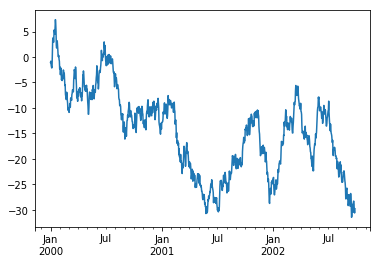

In [139]:
ts.plot()

DataFrame에서 [plot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) 메소드는 레이블에 있는 모든 열을 그릴 때 편리합니다



In [140]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  

In [141]:
df = df.cumsum()

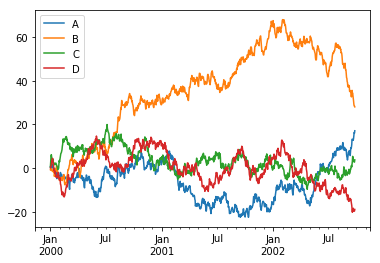

In [142]:
plt.figure(); df.plot(); plt.legend(loc='best')

#Getting Data In/Out

##CSV

[csv 파일에 씁니다.](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [143]:
df.to_csv('foo.csv')

[csv 파일에서 읽습니다.](https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [144]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.732311,-0.657097,0.701761,0.243486
1,2000-01-02,-0.388657,-0.259947,3.176101,0.550442
2,2000-01-03,0.055290,-0.871473,5.430325,0.817741
3,2000-01-04,-0.489805,-0.130035,6.188678,1.554195
4,2000-01-05,-0.144038,-0.444660,5.261520,2.623827
5,2000-01-06,0.694448,-0.927424,4.292713,3.587480
6,2000-01-07,1.582591,-1.336903,3.185624,3.463861
7,2000-01-08,1.445196,-1.033043,3.402886,4.492063
8,2000-01-09,1.542313,-0.979711,4.199413,3.424813
9,2000-01-10,0.859499,-0.911454,3.555116,2.021105


##HDF5
[HDFStores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)에 읽고 씁니다.

HDF5 Store에 씁니다.


In [145]:
df.to_hdf('foo.h5','df')

HDF5 Store에서 읽어옵니다.

In [146]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.732311,-0.657097,0.701761,0.243486
2000-01-02,-0.388657,-0.259947,3.176101,0.550442
2000-01-03,0.055290,-0.871473,5.430325,0.817741
2000-01-04,-0.489805,-0.130035,6.188678,1.554195
2000-01-05,-0.144038,-0.444660,5.261520,2.623827
2000-01-06,0.694448,-0.927424,4.292713,3.587480
2000-01-07,1.582591,-1.336903,3.185624,3.463861
2000-01-08,1.445196,-1.033043,3.402886,4.492063
2000-01-09,1.542313,-0.979711,4.199413,3.424813
2000-01-10,0.859499,-0.911454,3.555116,2.021105


## Excel
[MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)에 읽고 씁니다. 

엑셀 파일에 씁니다. 


In [147]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

엑셀 파일을 읽어옵니다.

In [148]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.732311,-0.657097,0.701761,0.243486
2000-01-02,-0.388657,-0.259947,3.176101,0.550442
2000-01-03,0.055290,-0.871473,5.430325,0.817741
2000-01-04,-0.489805,-0.130035,6.188678,1.554195
2000-01-05,-0.144038,-0.444660,5.261520,2.623827
2000-01-06,0.694448,-0.927424,4.292713,3.587480
2000-01-07,1.582591,-1.336903,3.185624,3.463861
2000-01-08,1.445196,-1.033043,3.402886,4.492063
2000-01-09,1.542313,-0.979711,4.199413,3.424813
2000-01-10,0.859499,-0.911454,3.555116,2.021105


# Gotchas

작업을 수행하려고 시도하면 다음과 같은 예외 상황을 볼 수도 있습니다 :

In [149]:
if pd.Series([False, True, False]):
print("I was true")

IndentationError: expected an indented block (<ipython-input-149-9074a2390e8e>, line 2)

설명 및 수행 할 작업은 [비교](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare)를 참조하십시오.

[Gotchas](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas)도 참조하십시오.
